In [2]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D
import random 
import pickle
import numpy as np
import matplotlib.pyplot as plt
import os
#os.environ["CUDA_VISIBLE_DEVICES"]="-1"
import cv2
from tensorflow.keras.callbacks import TensorBoard
import time

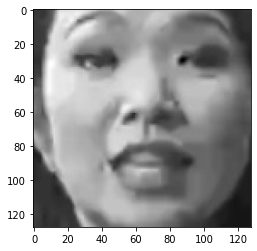

In [3]:
#Check to make sure you are reading from the correct dir
#Image will display in jupyter notebook
DATADIR = 'dataset/archive/train'
CATEGORIES = ['real_image', 'fake_image']

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) #path to fak_image and real_image dir
    #print(path)
    
    for foldername in os.listdir(path):
        folder_path = os.path.join(path, foldername) #full directory path per folder 
        #print(folder_path)
        for img in os.listdir(folder_path): #for each image in the image subfolder
            image_path = os.path.join(folder_path,img)
            #print(image_path)
            #convert image to grayscale 
            img_array = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            plt.imshow(img_array, cmap="gray")
            plt.show()
            break
        break
    break

In [4]:
#Function returns list of [image data, class]  within given directory 
def read_data(directory_name, x_list):
    #itterate through each folder defined in categories real_image and fake_image
    #change dir name each (test, training, validation) set has a folder 
    DATADIR = directory_name
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) #path to faek_image and real_image dir

        #We have a feature (img data) as numbers
        #We need classification 'real' and 'fake' as numbers 
        #Map to numerical value 1 = real, 0 = fake
        class_num = CATEGORIES.index(category)

        #itterate over images
        #outter loop: each folder 
        #inner loop: each image in each folder 
        for foldername in os.listdir(path):
            folder_path = os.path.join(path, foldername) #full directory path per folder 
            #print("curr folder outter loop" + folder_path)
            for img in os.listdir(folder_path): #for each image in the image subfolder
                image_path = os.path.join(folder_path,img)
                #convert image to grayscale 
                img_array = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
                #plt.imshow(img_array, cmap="gray")
                #plt.show()
                #perform resizing here if needed 
                x_list.append([img_array, class_num])
    return x_list

In [5]:
#Read Training Data
training_data = []
training_data = read_data('dataset/archive/train', training_data)

In [6]:
#Read Validation Data
validation_data = []
validation_data = read_data('dataset/archive/val', validation_data)

In [7]:
#shuffle training data
#do not shuffle validation data to get consistant output 
random.shuffle(training_data)

In [8]:
#feature set
X = []
#labels 
y = []

#Validation set 
X_val = []
#labels 
y_val = []

In [9]:
for features, label in training_data:
    X.append(features)
    y.append(label)
#Cannot pass a list to a neural network
#convert X to a numpy array
#-1 is how many features do we have -- any number 
#128,128 is IMG_SIZE (shape of data)
#last param: 1 because it is a grayscale (3 if colored images)
X = np.array(X).reshape(-1, 128, 128, 1)

#Save with Val set
for features, label in validation_data:
    X_val.append(features)
    y_val.append(label)
X_val = np.array(X).reshape(-1, 128, 128, 1)

In [10]:
#save the state of our data (our image DS formatted to grayscale)
pickle_out = open("X.pickle","wb")
pickle.dump(X, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [11]:
#save the state of our data (our image DS formatted to grayscale)
pickle_out = open("X_val.pickle","wb")
pickle.dump(X_val, pickle_out)
pickle_out.close()

pickle_out = open("y_val.pickle", "wb")
pickle.dump(y_val, pickle_out)
pickle_out.close()